# Saudi Used Cars Project

This is the third capstone project of the Bootcamp Data Science and Machine Learning at DTI Purwadhika. The goal of the project is to predict the price of a used car based on its features.



# Business Problem Understanding

## Context
A dataset of used cars in Saudi Arabia with various features like make, model, year, mileage, and price. The goal is to analyze the factors affecting car prices and build a model to predict used car prices accurately, helping both buyers and sellers make informed decisions in the used car market.

## Problem Statement
The used car market faces several challenges:
1. Price uncertainty leads to inefficient negotiations and potential financial losses
2. Many factors influence car prices (age, mileage, brand, etc.), making manual estimation difficult
3. Market participants lack reliable tools to validate car valuations
4. Time and resources are wasted in price negotiations due to information asymmetry

## Goals
1. Develop an accurate price prediction model to:
   - Help sellers set competitive yet fair prices
   - Help buyers evaluate if asking prices are reasonable
   - Reduce negotiation time and friction in transactions
2. Identify key factors that influence used car prices in Saudi Arabia
3. Compare different machine learning approaches to find the most reliable prediction method

## Analytic Approach
1. Data Analysis:
   - Analyze relationships between features and price
   - Identify patterns and trends in the market
   - Handle missing values and outliers appropriately

2. Model Development:
   We'll test multiple regression models:
   - Linear Regression (baseline model)
   - Ridge
   - Lasso
   - Random Forest Regressor
   - XGBoost Regressor
   - LightGBM Regressor
   
3. Model Comparison:
   - Compare models using multiple metrics
   - Analyze trade-offs between complexity and accuracy
   - Select the best model based on performance and practicality

## Metric Evaluation
We'll use multiple metrics to ensure robust model evaluation:

Primary Metrics:
- R² Score: To measure the model's explanatory power
- RMSE (Root Mean Square Error): To measure prediction accuracy in actual price terms
- MAE (Mean Absolute Error): To measure average prediction error

Secondary Considerations:
- Model training time
- Prediction speed
- Model interpretability
- Feature importance analysis

The final model selection will balance prediction accuracy with practical considerations like computation speed and interpretability.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, TargetEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', message='The least populated class in y.*')
warnings.filterwarnings('ignore', message='The least populated class in y has only')

## Data Loading and Initial Exploration

In [44]:
# 1. Data Loading and Initial Exploration
df = pd.read_csv('data/data_saudi_used_cars.csv')

# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
display(df.describe(include='all'))


Dataset Shape: (5624, 11)

Missing Values:
 Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
count,5624,5624,5624,5624,5624,5624,5624.000000,5624.000000,5.624000e+03,5624,5624.000000
unique,347,27,58,2,4,3,NaN,NaN,NaN,2,NaN
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,NaN,NaN,NaN,False,NaN
freq,269,2272,1431,4875,4188,2233,NaN,NaN,NaN,3828,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.101885,3.295430,1.509234e+05,NaN,53074.058144
std,NaN,NaN,NaN,NaN,NaN,NaN,5.791606,1.515108,3.828360e+05,NaN,70155.340614
min,NaN,NaN,NaN,NaN,NaN,NaN,1963.000000,1.000000,1.000000e+02,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,2.000000,3.800000e+04,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,3.000000,1.030000e+05,NaN,36500.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,4.500000,1.960000e+05,NaN,72932.500000


We can see following points in the statistic description:

- There are 1797 rows with price = 0, which is not a valid price.

- `Type`, `Region`, `Make` are categorical features that have high cardinality

- `Options` is an ordinal (Standard, Semi Full, Full) feature that has low cardinality

- `Gear_Type` is categorical (Automatic, Manual) feature that has low cardinality


In [45]:
numerical_features = ['Year', 'Mileage', 'Engine_Size']
categorical_features = ['Make', 'Model', 'Type', 'Origin', 'Gear_Type', 'Options', 'Region']

In [46]:
display(df['Engine_Size'].value_counts())
display(df['Engine_Size'].unique())


df.describe(include='all')



Engine_Size
3.5    511
2.0    440
2.5    439
1.6    411
2.4    385
      ... 
5.1      1
7.2      1
8.8      1
6.9      1
8.9      1
Name: count, Length: 71, dtype: int64

array([1.4, 8. , 5. , 2.4, 4. , 2. , 4.8, 3.5, 4.6, 5.7, 2.7, 1. , 3. ,
       1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9. , 4.7, 4.5,
       3.8, 5.5, 2.6, 1.8, 1.2, 6. , 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9,
       4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7. , 1.9, 7.5, 4.3, 6.5, 3.1,
       6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7,
       7.8, 3.9, 8.7, 4.9, 6.8, 8.9])

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
count,5624,5624,5624,5624,5624,5624,5624.000000,5624.000000,5.624000e+03,5624,5624.000000
unique,347,27,58,2,4,3,NaN,NaN,NaN,2,NaN
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,NaN,NaN,NaN,False,NaN
freq,269,2272,1431,4875,4188,2233,NaN,NaN,NaN,3828,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.101885,3.295430,1.509234e+05,NaN,53074.058144
std,NaN,NaN,NaN,NaN,NaN,NaN,5.791606,1.515108,3.828360e+05,NaN,70155.340614
min,NaN,NaN,NaN,NaN,NaN,NaN,1963.000000,1.000000,1.000000e+02,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,2.000000,3.800000e+04,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,3.000000,1.030000e+05,NaN,36500.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,4.500000,1.960000e+05,NaN,72932.500000


#### Drop duplicates

In [47]:
display("Duplicated rows:", df.duplicated().sum())

df = df.drop_duplicates()

display("Duplicated rows now:", df.duplicated().sum())

'Duplicated rows:'

4

'Duplicated rows now:'

0

## Feature Engineering and Feature Selection

### Cars with price = 0


We have around 1797 cars with price = 0. Since this is not valid price, as far as modelling is concerned, these prices will make the model biased, and the data will be skewed for price prediction model.

Let's see the distribution of the cars with price = 0.


In [48]:
display(df[df['Price'] == 0].describe(include='all'))

# Calculate percentage of negotiable prices
negotiable_pct = (df['Negotiable'].sum() / len(df)) * 100
print(f"\nPercentage of negotiable prices in original dataset: {negotiable_pct:.2f}%")

df_zero_price = df[df['Price'] == 0]
df = df[df['Price'] != 0]

# raw_df is raw dataframe with removed price = 0 records
raw_df = df.copy()

display(df_zero_price['Negotiable'].value_counts())


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
count,1796,1796,1796,1796,1796,1796,1796.000000,1796.000000,1.796000e+03,1796,1796.0
unique,221,27,43,2,4,3,NaN,NaN,NaN,2,NaN
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,NaN,NaN,NaN,True,NaN
freq,121,655,541,1451,1291,759,NaN,NaN,NaN,1795,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2012.501670,3.541537,1.685968e+05,NaN,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,6.757189,1.601942,3.920362e+05,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,1965.000000,1.000000,1.000000e+02,NaN,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,2.400000,1.575000e+04,NaN,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,3.500000,1.000000e+05,NaN,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,4.600000,2.220000e+05,NaN,0.0



Percentage of negotiable prices in original dataset: 31.94%


Negotiable
True     1795
False       1
Name: count, dtype: int64

As you can see, almost all of the cars with price = 0 are negotiable. It does not introduce variability in the data, i.e. not a good predictor. Thus, we'll drop these rows for now.


## Numerical Features Analysis


### Correlation with Price

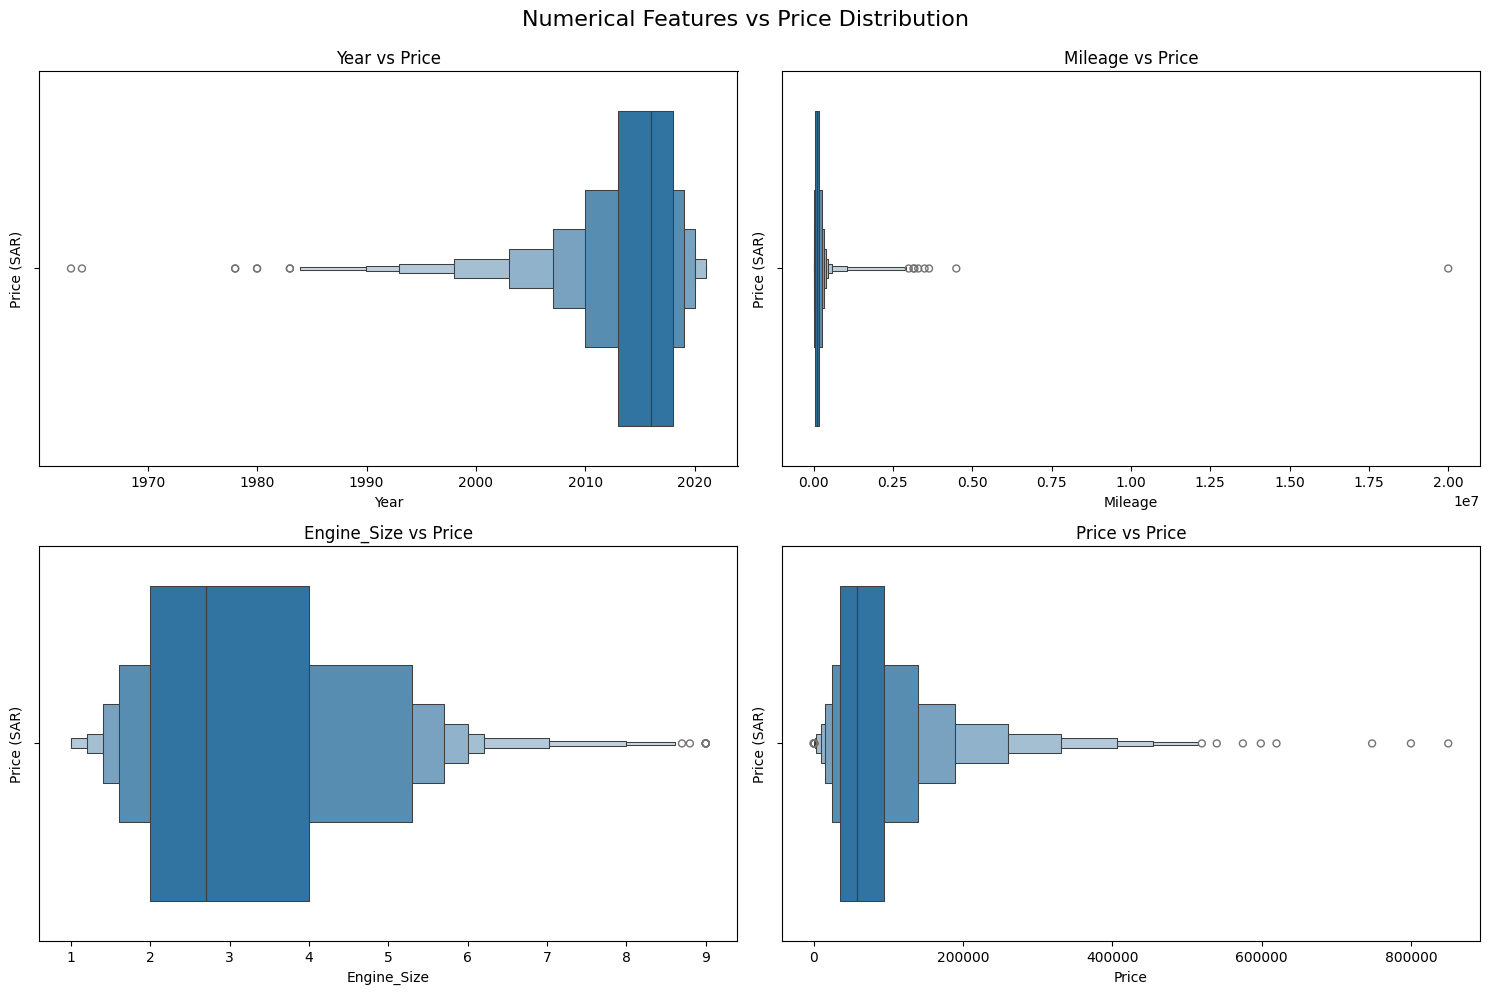

In [8]:
all_numerical_features = numerical_features + ['Price']

# create boxplot for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15,  10))
fig.suptitle('Numerical Features vs Price Distribution', fontsize=16, y=0.99)

for idx, feature in enumerate(all_numerical_features):
    row = idx // 2
    col = idx % 2

    sns.boxenplot(data=df, x=feature, ax=axes[row, col])
    
    axes[row, col].set_title(f'{feature} vs Price')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Price (SAR)')

plt.tight_layout()
plt.show()


### Remove outliers

There is strange outlier in `Mileage` (top-right boxplot), the values seems odd `20.000.000` if we compare to other high mileage cars.

Let's drop this row for now, as it's too high even compared to other high mileage cars.


In [9]:
def remove_outliers(df, columns, n_std=3):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        df = df[np.abs(df[col] - mean) <= (n_std * std)]
    
    return df

def remove_outliers_iqr(df, columns, k=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[
            (df_clean[col] >= Q1 - k * IQR) & 
            (df_clean[col] <= Q3 + k * IQR)
        ]
    return df_clean

# df = remove_outliers(df, numerical_features)
df_clean = remove_outliers_iqr(df, numerical_features)

df_clean.describe(include='all')
# df = df[df['Mileage'] < 20000000]
# df[df['Mileage'] > 1000000].sort_values(by='Mileage', ascending=False)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
count,3530,3530,3530,3530,3530,3530,3530.000000,3530.000000,3530.000000,3530,3530.000000
unique,309,27,55,2,4,3,NaN,NaN,NaN,1,NaN
top,Accent,Riyadh,Toyota,Automatic,Saudi,Full,NaN,NaN,NaN,False,NaN
freq,145,1524,792,3219,2695,1344,NaN,NaN,NaN,3530,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2015.796601,3.105156,115736.320963,NaN,81212.944193
std,NaN,NaN,NaN,NaN,NaN,NaN,3.241046,1.382896,89529.201686,NaN,73078.417447
min,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000,1.000000,100.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,2.000000,48000.000000,NaN,38000.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,2.700000,99000.000000,NaN,60000.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,4.000000,169225.000000,NaN,98000.000000


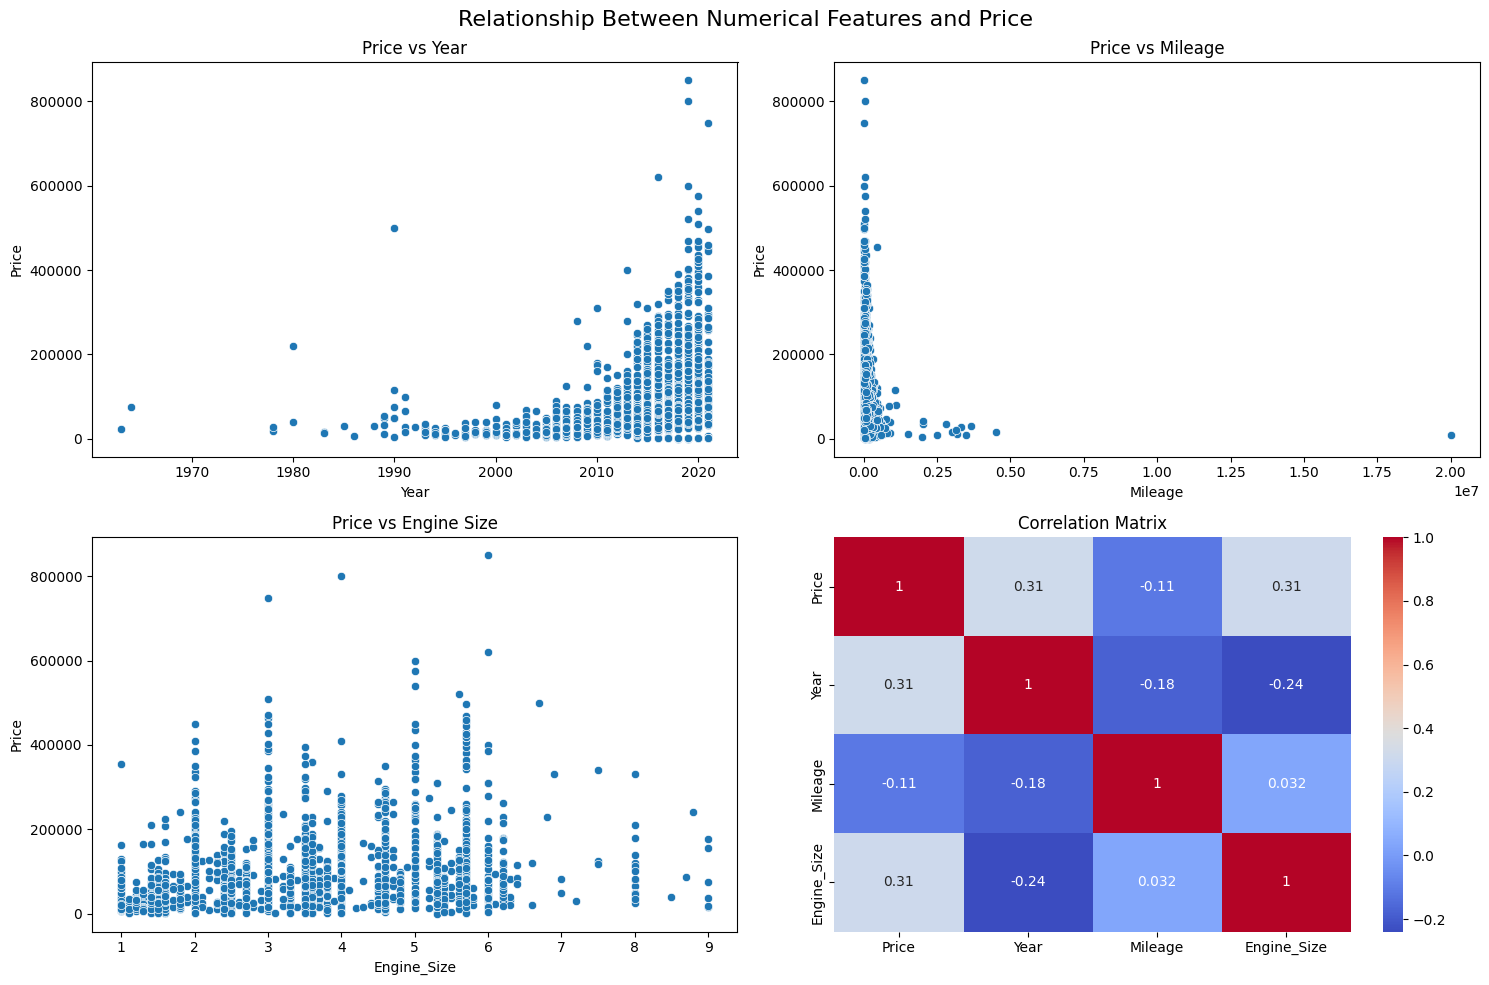


Correlation with Price:
Year: 0.314
Mileage: -0.113
Engine_Size: 0.308


In [10]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Relationship Between Numerical Features and Price', fontsize=16)

# Plot Price vs Year
sns.scatterplot(data=df[df['Price'] > 0], x='Year', y='Price', ax=axes[0,0])
axes[0,0].set_title('Price vs Year')

# Plot Price vs Mileage
sns.scatterplot(data=df[df['Price'] > 0], x='Mileage', y='Price', ax=axes[0,1])
axes[0,1].set_title('Price vs Mileage')

# Plot Price vs Engine_Size
sns.scatterplot(data=df[df['Price'] > 0], x='Engine_Size', y='Price', ax=axes[1,0])
axes[1,0].set_title('Price vs Engine Size')

# Calculate correlation
correlation_matrix = df[['Price', 'Year', 'Mileage', 'Engine_Size']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Print correlation values with Price
print("\nCorrelation with Price:")
for col in ['Year', 'Mileage', 'Engine_Size']:
    correlation = df[col].corr(df['Price'])
    print(f"{col}: {correlation:.3f}")

### Result

1. `Year vs Price`
    - Moderately negative correlation (0.31)
    - Almost linear with significant outliers (old cars and high price luxury cars)

2. `Mileage vs Price`
    - Negative weak correlation (-0.19)
    - Non linear

3. `Engine_Size vs Price`
    - Positive correlation (0.35)
    - Non linear correlation

Since both linear and non-linear correlation is present, we'll keep all of them, and to *assess* which model is the most suitable, together with categorical features.


## Categorical Features Correlation

Let's see the distribution of the price by each categorical feature.

### Boxplot distribution of price by each categorical feature

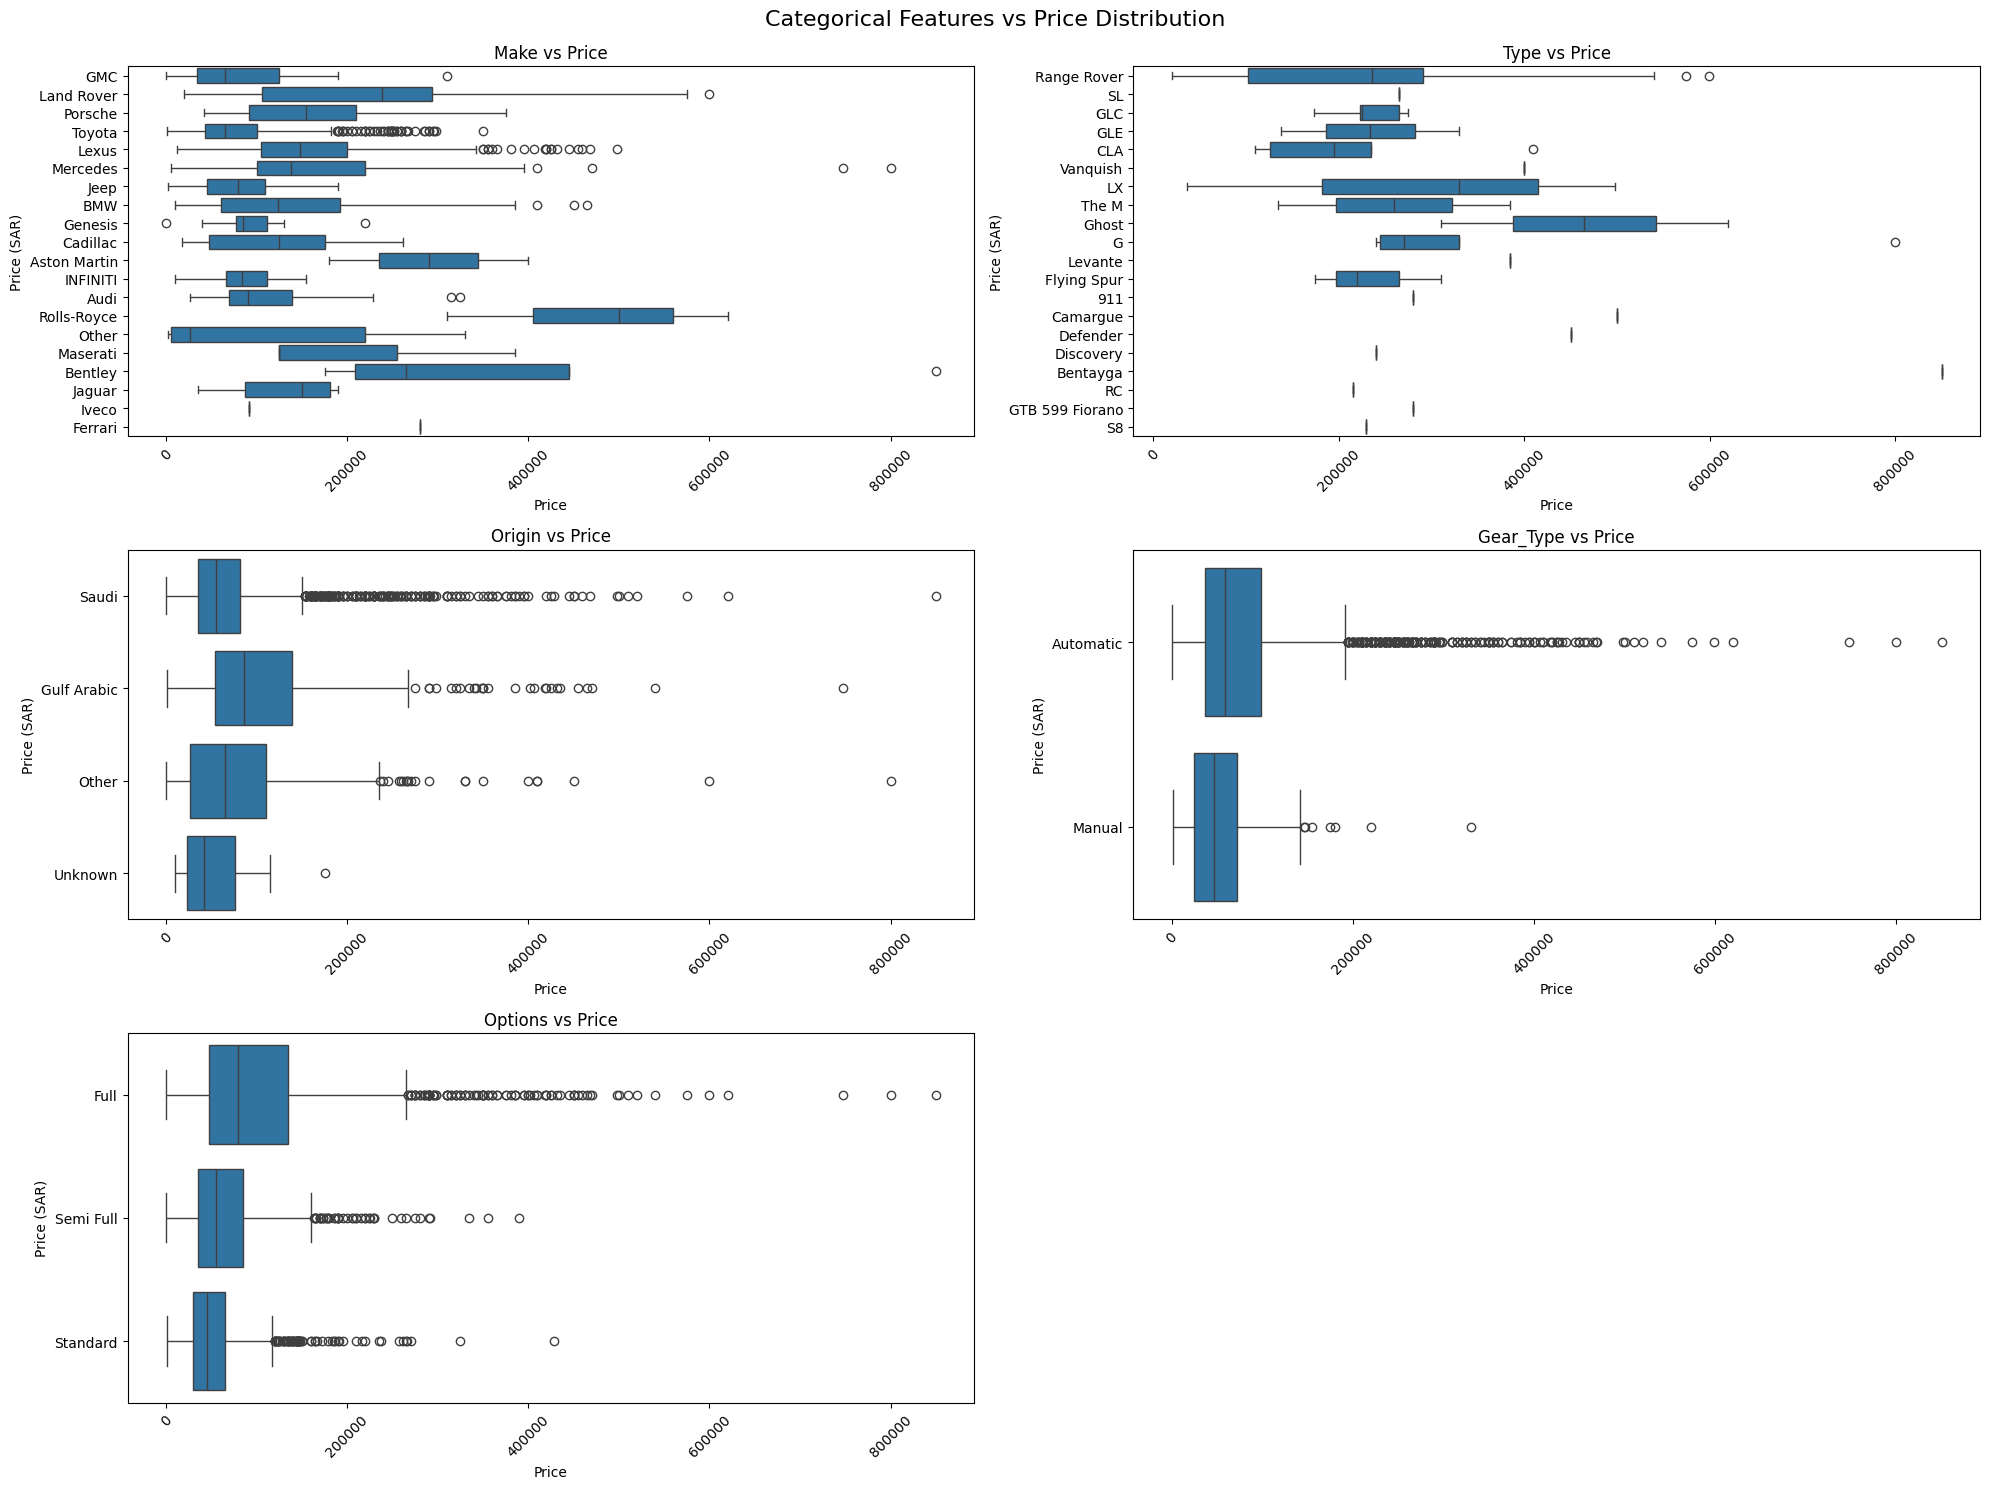

In [52]:
# Create boxplot for categorical features vs price
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Categorical Features vs Price Distribution', fontsize=16, y=0.99)

# Select top 4 categorical features based on their correlation
important_cats = ['Make', 'Type', 'Origin', 'Gear_Type', 'Options']

for idx, feature in enumerate(important_cats):
    row = idx // 2
    col = idx % 2
    
    if not (row == 2 and col == 1):
        # Calculate mean price for each category
        mean_prices = df.groupby(feature)['Price'].mean().sort_values(ascending=False).head(20)
        
        # Create bar plot
        sns.boxplot(data=df[df[feature].isin(mean_prices.index)], 
                    x='Price', y=feature,
                    ax=axes[row, col])
        
        axes[row, col].set_title(f'{feature} vs Price')
        axes[row, col].tick_params(axis='x', rotation=45)
        axes[row, col].set_ylabel('Price (SAR)')

axes[2, 1].set_visible(False)
plt.tight_layout()
plt.show()

## Data preprocessing

In [12]:
df_encoded = df.copy()
display(df_encoded)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


### Encode categorical variables

Based on observation, we have 3 types of categorical features:

1. Ordinal features: `Options` -> this is showing a car's interior features: `standard`, `semi-full` and `full`

2. Low cardinality features: `Gear_Type`, `Origin`

3. High cardinality features: `Type`, `Region`, `Make`


### Scaling numerical features

We'll use `StandardScaler` to scale the target variable, since it's important for encoding categorical features


Scaled numerical features statistics:
           Year   Mileage  Engine_Size
count  3824.000  3824.000     3824.000
mean      0.000    -0.000       -0.000
std       1.000     1.000        1.000
min     -10.147    -0.377       -1.495
25%      -0.362    -0.250       -0.810
50%       0.225    -0.105       -0.330
75%       0.616     0.107        0.561
max       1.203    52.485        3.989


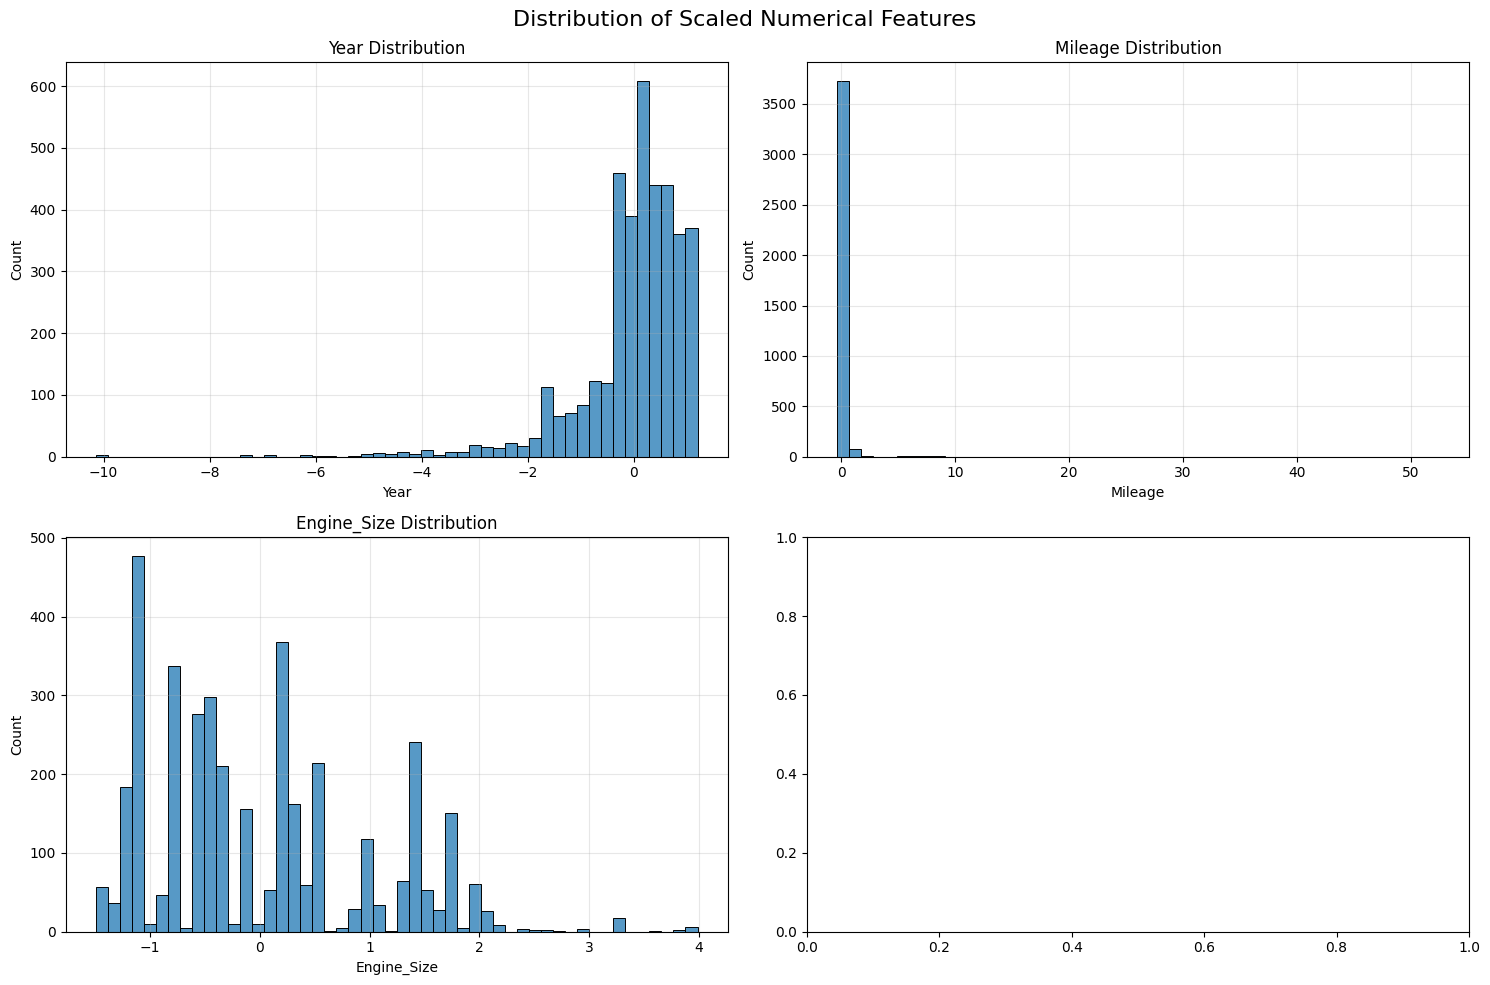

In [13]:
scaler = StandardScaler()
scaled_price = scaler.fit_transform(df[['Price']])

df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Verify the scaling
print("Scaled numerical features statistics:")
print(df_encoded[numerical_features].describe().round(3))

# Optional: Visualize the scaled distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Scaled Numerical Features', fontsize=16)

for idx, feature in enumerate(numerical_features):
    row = idx // 2
    col = idx % 2
    
    sns.histplot(data=df_encoded, x=feature, bins=50, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [14]:
# Handle categorical variables
ordinal_feature = 'Options'
low_cardinality_features = ['Gear_Type', 'Origin']
high_cardinality_features = ['Type', 'Region', 'Make']

# start the order from the lowest to the highest
options = ['Standard', 'Semi Full', 'Full']

encoders = {}
# Get one hot encoding for low cardinality features
df_encoded = pd.get_dummies(df_encoded, columns=low_cardinality_features, prefix=low_cardinality_features)

# Get ordinal encoding
ordinal = OrdinalEncoder(categories=[options])
df_encoded['Options'] = ordinal.fit_transform(df_encoded[[ordinal_feature]])

# Get target encoding for high cardinality features
for feature in high_cardinality_features:
    encoders[feature] = TargetEncoder()
    
    # Fit and transform on the same DataFrame
    df_encoded[feature] = encoders[feature].fit_transform(df[[feature]], scaled_price)


df_encoded

for feature in high_cardinality_features:
    print(f"\n{feature} encoding stats:")
    print(df_encoded[feature].describe())


Type encoding stats:
count    3824.000000
mean       -0.019897
std         0.652018
min        -1.051671
25%        -0.446802
50%        -0.185330
75%         0.156890
max         7.451068
Name: Type, dtype: float64

Region encoding stats:
count    3824.000000
mean        0.001393
std         0.159626
min        -0.642614
25%        -0.049589
50%         0.038010
75%         0.062712
max         0.577145
Name: Region, dtype: float64

Make encoding stats:
count    3824.000000
mean       -0.012802
std         0.559207
min        -1.056140
25%        -0.353148
50%        -0.152148
75%         0.020732
max         4.959885
Name: Make, dtype: float64


### Visualize the encoded feature distribution

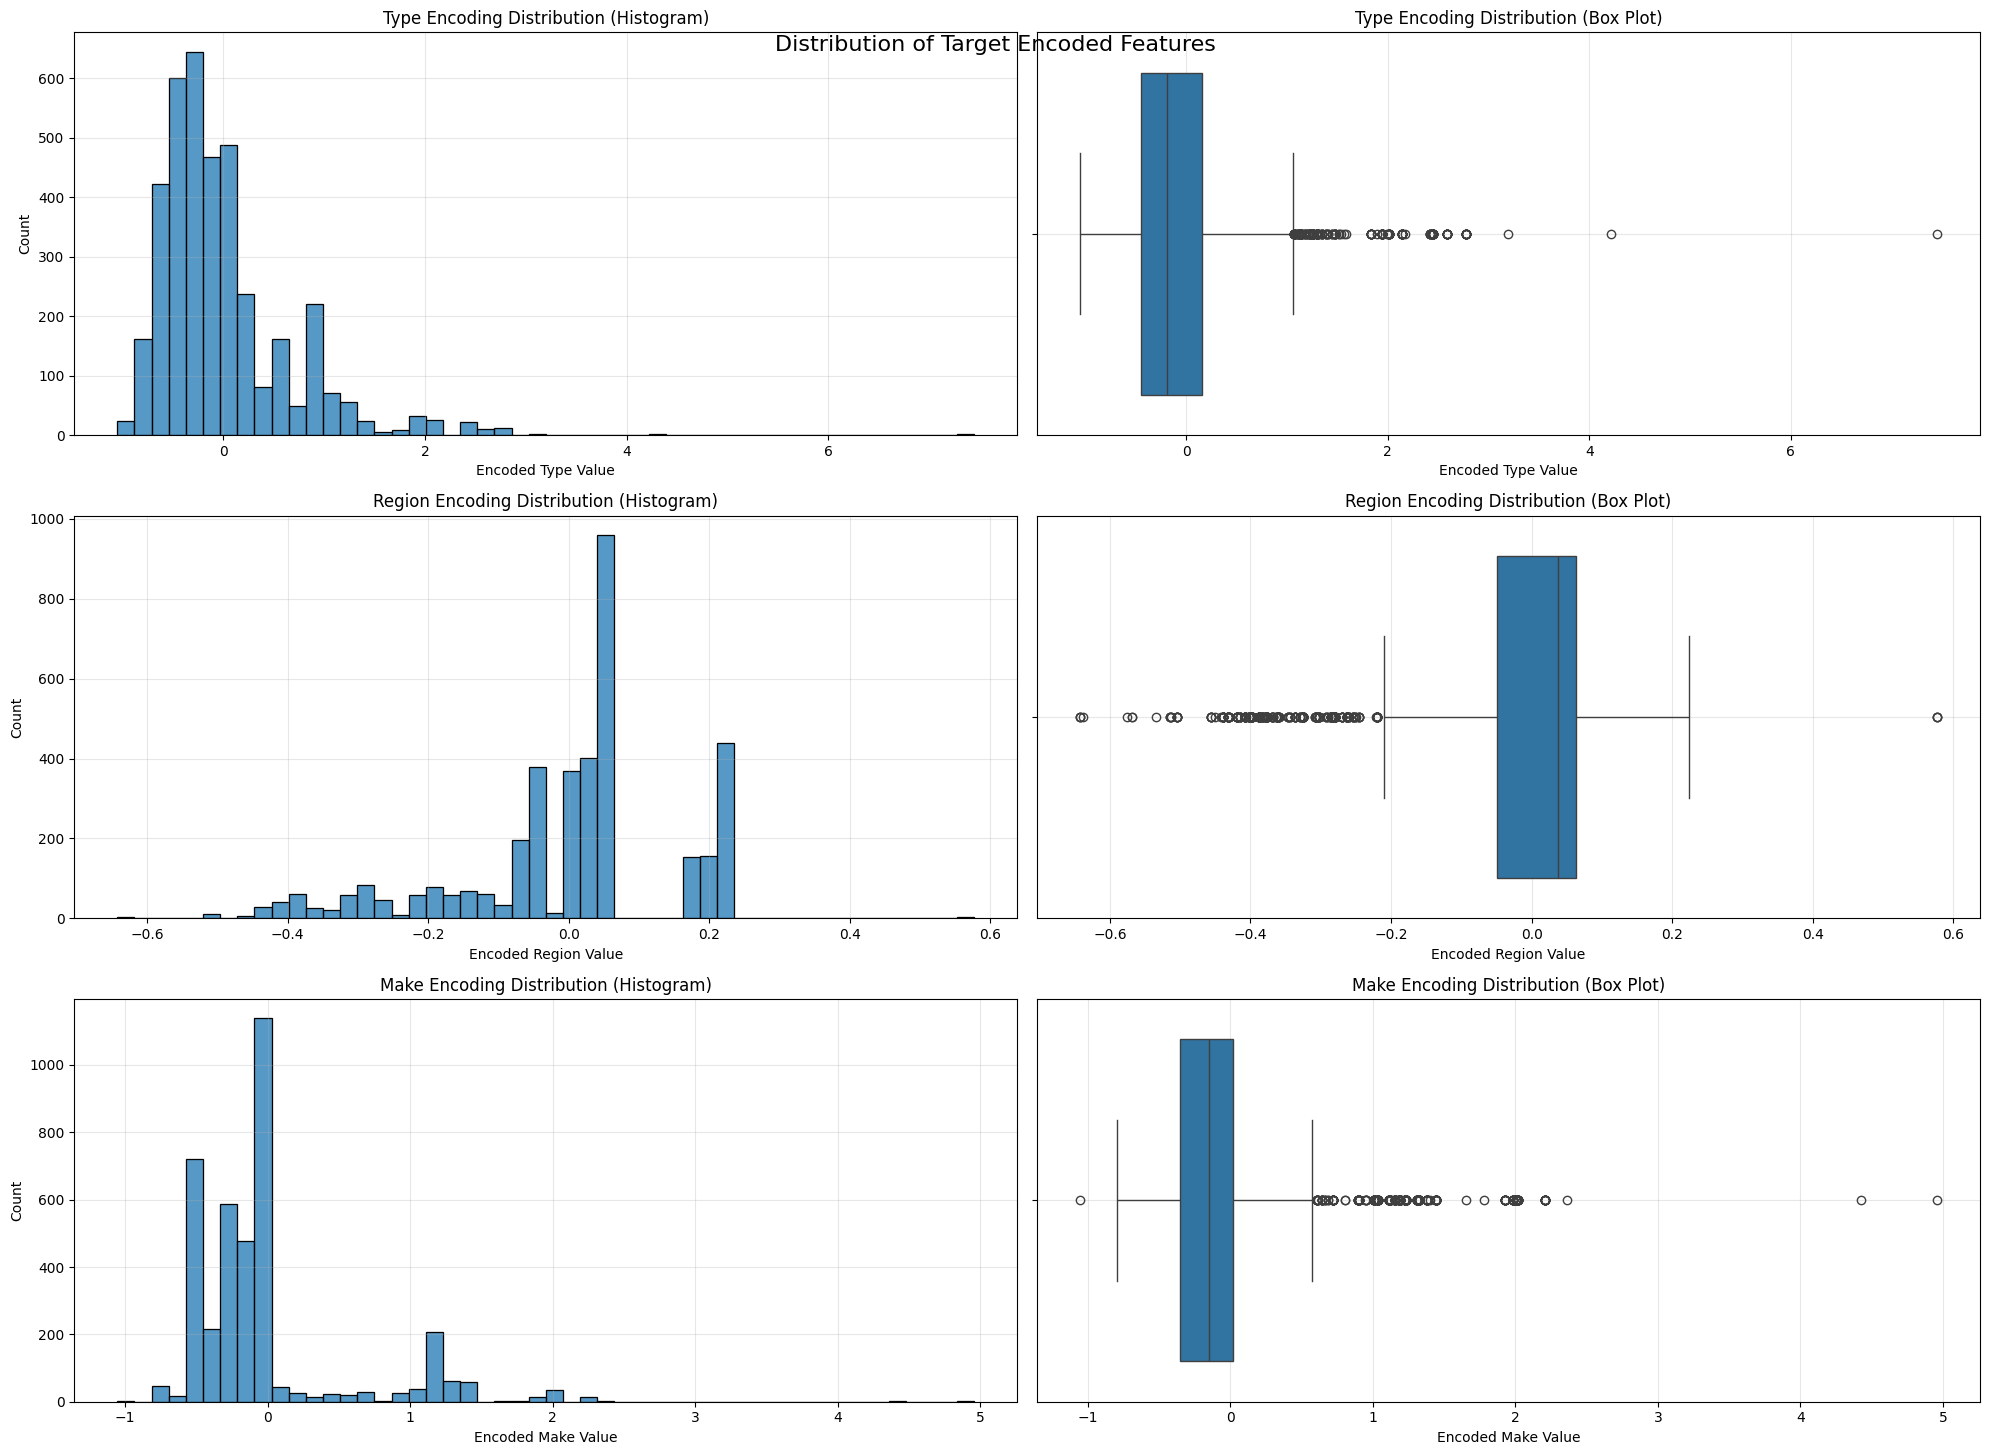


Type encoding stats:
count    3824.000
mean       -0.020
std         0.652
min        -1.052
25%        -0.447
50%        -0.185
75%         0.157
max         7.451
Name: Type, dtype: float64
Skewness: 1.992
Kurtosis: 7.679

Region encoding stats:
count    3824.000
mean        0.001
std         0.160
min        -0.643
25%        -0.050
50%         0.038
75%         0.063
max         0.577
Name: Region, dtype: float64
Skewness: -0.882
Kurtosis: 0.946

Make encoding stats:
count    3824.000
mean       -0.013
std         0.559
min        -1.056
25%        -0.353
50%        -0.152
75%         0.021
max         4.960
Name: Make, dtype: float64
Skewness: 2.076
Kurtosis: 5.339


In [15]:
# Create distribution plots for encoded features
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Distribution of Target Encoded Features', fontsize=16, y=0.95)

# List of encoded features
encoded_features = ['Type', 'Region', 'Make']

for idx, feature in enumerate(encoded_features):
    # Histogram on the left
    sns.histplot(data=df_encoded, x=feature, bins=50, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'{feature} Encoding Distribution (Histogram)')
    axes[idx, 0].set_xlabel(f'Encoded {feature} Value')
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Box plot on the right
    sns.boxplot(data=df_encoded, x=feature, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'{feature} Encoding Distribution (Box Plot)')
    axes[idx, 1].set_xlabel(f'Encoded {feature} Value')
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
for feature in encoded_features:
    print(f"\n{feature} encoding stats:")
    print(df_encoded[feature].describe().round(3))
    
    # Calculate additional statistics
    skewness = df_encoded[feature].skew()
    kurtosis = df_encoded[feature].kurtosis()
    print(f"Skewness: {skewness:.3f}")
    print(f"Kurtosis: {kurtosis:.3f}")

## Model Development and Analysis

We will test and evaluate 6 models to predict the price of the car:
- Linear Regression
- Ridge
- Lasso
- Random Forest
- XGBoost
- LightGBM


In [16]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold

def fit_with_early_stopping(model, X, y):
    # Create validation set for early stopping
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42
    )
    
    # Fit with early stopping
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        verbose=False
    )
    
    return model

# Calculate and print comprehensive metrics
def print_metrics(y_true, y_pred, dataset_name=""):
    print(f"\n{dataset_name} Metrics:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred):.4f}")
    
    # Calculate percentage of predictions within different error margins
    for margin in [10, 20, 30]:
        within_margin = np.mean(np.abs((y_true - y_pred) / y_true) <= margin/100) * 100
        print(f"Within {margin}% margin: {within_margin:.2f}%")

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42
    )
    
    eval_set = [(X_train, y_train), (X_val, y_val)]
    
    model.fit(
        X_train, y_train,
        eval_set=eval_set,
        eval_metric='rmse',
        verbose=False
    )
    
    results = model.evals_result()
    
    plt.figure(figsize=(10, 6))
    plt.plot(results['validation_0']['rmse'], label='Train')
    plt.plot(results['validation_1']['rmse'], label='Validation')
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.title('Learning Curves')
    plt.legend()
    plt.show()

## Model Development and Evaluation

We skip scaling the independent variables / features because it's already scaled in the preprocessing step.

However, we don't scale the *target variable* / `Price`, since it's important for encoding categorical features.


Let's try to improve the model by using pipeline and cross validation, to have consistent and better model performance and evaluation.

In [101]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', message='The least populated class in y.*')
from sklearn.model_selection import StratifiedKFold

y_log = np.log1p(df_clean['Price']) 

# 1. First remove outliers
df_clean = remove_outliers_iqr(raw_df, numerical_features)

# to show the order of each options
options = ['Standard', 'Semi Full', 'Full']

# 2. Create feature groups for the pipeline
numeric_features = ['Mileage', 'Engine_Size']
ordinal_feature = ['Options']
target_encoder_features = ['Origin', 'Gear_Type', 'Make', 'Type', 'Region']

# 3. Create preprocessing pipeline with your existing scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

year_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

other_numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[options]))
])

target_encoder_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder())
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('year', year_transformer, ['Year']),
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_feature),
        ('cat', target_encoder_transformer, target_encoder_features)
    ],
    remainder='drop'
)

X_clean = df_clean.drop('Price', axis=1)
y_clean = df_clean['Price']

X_train, X_val, y_train, y_val = train_test_split(
    X_clean, y_clean, 
    test_size=0.2, 
    random_state=42
)

xgb_params_ori = {
    'n_estimators': 1378, # this is obtained by manually increment n_estimators with early stopping
    'max_depth': 4,
    'min_child_weight': 6,
    'subsample': 0.75,
    'colsample_bytree': 0.75,
    'learning_rate': 0.015,
    'gamma': 0.25,
    'reg_alpha': 1.5,
    'reg_lambda': 6.0,
    'random_state': 42
}

xgb_params = {
    'n_estimators': 1378,          # From tuning
    'max_depth': 5,                # From tuning
    'min_child_weight': 6,         # From tuning
    'subsample': 0.75,             # From tuning
    'colsample_bytree': 0.75,      # From tuning
    'learning_rate': 0.02,         # From tuning
    'gamma': 0.4,                  # From tuning
    'reg_alpha': 1.5,              # Keeping previous value
    'reg_lambda': 6.0,             # Keeping previous value
    'random_state': 42
}

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(**xgb_params))
])


# Simple cross-validation with standard metrics
cv = KFold(n_splits=20, shuffle=True, random_state=42)
cv_results = cross_validate(
    model_pipeline,
    X_clean,
    y_clean,
    cv=cv,
    scoring={
        'rmse': 'neg_root_mean_squared_error',
        'mae': 'neg_mean_absolute_error',
        'r2': 'r2'
    },
    return_train_score=True,
    n_jobs=-1
)

# Print results
print("\nCross-validation results:")
print("RMSE:")
print(f"Train: {-cv_results['train_rmse'].mean():.2f} (+/- {cv_results['train_rmse'].std() * 2:.2f})")
print(f"Test:  {-cv_results['test_rmse'].mean():.2f} (+/- {cv_results['test_rmse'].std() * 2:.2f})")

print("\nR2:")
print(f"Train: {cv_results['train_r2'].mean():.4f} (+/- {cv_results['train_r2'].std() * 2:.4f})")
print(f"Test:  {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")


/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_se


Cross-validation results:
RMSE:
Train: 22887.25 (+/- 2253.83)
Test:  28151.17 (+/- 16120.93)

R2:
Train: 0.9017 (+/- 0.0189)
Test:  0.8417 (+/- 0.1410)


## Result


### Cross-validation results (using manually found optimum parameters):

1. `RMSE`:
   - Train: 24886.23 (+/- 1750.89)
   - Test:  28673.99 (+/- 15899.29)

2. `R2`:
   - Train: 0.8838 (+/- 0.0168)
   - Test:  0.8365 (+/- 0.1369)

As we can see, the model is experiencing overfitting, since the training R2 score is much higher than the test score.

We can try to improve the model by tuning these params to reduce variance.


## Hyperparameter Tuning

We can use `RandomizedSearchCV` to tune the hyperparameters of the model.


In [99]:
param_grid = {
    'n_estimators': [1200, 1378, 1500],  # Center around our manually found optimum
    'max_depth': [3, 4, 5],              # Try shallower and deeper trees
    'min_child_weight': [4, 6, 8],       # Adjust complexity
    'subsample': [0.6, 0.75, 0.9],       # Try different sample sizes
    'colsample_bytree': [0.6, 0.75, 0.9],# Try different feature sampling
    'learning_rate': [0.01, 0.015, 0.02], # Try different learning rates
    'gamma': [0.1, 0.25, 0.4]            # Try different minimum loss reductions
}

# Define parameter grid for XGBoost
param_grid = {
    'regressor__n_estimators': [1200, 1378, 1500],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_child_weight': [4, 6, 8],
    'regressor__subsample': [0.6, 0.75, 0.9],
    'regressor__colsample_bytree': [0.6, 0.75, 0.9],
    'regressor__learning_rate': [0.01, 0.015, 0.02],
    'regressor__gamma': [0.1, 0.25, 0.4]
}

# Create the pipeline with your existing preprocessor
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Setup RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(
    model_pipeline,
    param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the random search
print("Starting hyperparameter tuning...")
random_search.fit(X_clean, y_clean)

# Print results
print("\nBest parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Starting hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_se


Best parameters: {'regressor__subsample': 0.75, 'regressor__n_estimators': 1378, 'regressor__min_child_weight': 6, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.02, 'regressor__gamma': 0.4, 'regressor__colsample_bytree': 0.75}
Best cross-validation score: 0.8306717038154602


## Hyperparameter Tuning Result

The best parameters are:
- `n_estimators`: 1378

- `max_depth`: 5

- `min_child_weight`: 6

- `subsample`: 0.75

- `colsample_bytree`: 0.75

- `learning_rate`: 0.02

- `gamma`: 0.4

Best cross-validation score: `0.8306717038154602`

We will use these parameters to see if one training can improve the model performance.



### Applying to one model training (after tuning)

1. `RMSE`:
   - Train: 22887.25 (+/- 2253.83)
   - Test:  28151.17 (+/- 16120.93)

2. `R2`:
   - Train: 0.9017 (+/- 0.0189)
   - Test:  0.8417 (+/- 0.1410)

As we can see, we already got slightly lower RMSE for training AND test. However, the model is still overfitting, since the training R2 score is much higher than the test score (after tuning).

We can try to improve the model by using ensemble method.


## Improving accuracy with Ensemble method

Let's try to see if ensemble method can improve the accuracy of our model.

In [102]:
# First level (base) models
base_models = [
    ('rf', RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    )),
    ('xgb', XGBRegressor(**xgb_params)),
    ('lgbm', LGBMRegressor(
        n_estimators=200,
        learning_rate=0.1,
        num_leaves=31,
        random_state=42
    ))
]

# base model's best RMSE
best_rmse = 28151.17
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

meta_model = Lasso()

# Create stacking ensemble
stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# Create the full pipeline with preprocessing and stacking
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', stacking)
])

# Train and evaluate the stacking model
print("Training stacking ensemble...")
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Fit the model
stacking_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train = stacking_pipeline.predict(X_train)
y_pred_test = stacking_pipeline.predict(X_test)

# Print detailed metrics
print("\n=== Stacking Ensemble Performance ===")
print_metrics(y_train, y_pred_train, "Training")
print_metrics(y_test, y_pred_test, "Test")

# Compare with previous best model
stacking_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
improvement = ((best_rmse - stacking_rmse) / best_rmse) * 100
print(f"\nRMSE Improvement over previous best model: {improvement:.2f}%")

cv_scores = cross_validate(
    stacking_pipeline,
    X_clean,
    y_clean,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("\nCross-validation results:")
for metric in scoring.keys():
    train_scores = cv_scores[f'train_{metric}']
    test_scores = cv_scores[f'test_{metric}']
    
    # Handle negative scores for RMSE and MAE
    if metric in ['rmse', 'mae']:
        train_scores = -train_scores
        test_scores = -test_scores
    
    print(f"\n{metric.upper()}:")
    print(f"Train: {train_scores.mean():.4f} (+/- {train_scores.std() * 2:.4f})")
    print(f"Test:  {test_scores.mean():.4f} (+/- {test_scores.std() * 2:.4f})")

Training stacking ensemble...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26522
[LightGBM] [Info] Number of data points in the train set: 2824, number of used features: 2157
[LightGBM] [Info] Start training from score 81772.459986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25853
[LightGBM] [Info] Number of data points in the train set: 2259, number of used features: 2153
[LightGBM] [Info] Start training from score 82339.140328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26064
[LightGBM] [I

/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.116007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26525
[LightGBM] [Info] Number of data points in the train set: 2824, number of used features: 2137
[LightGBM] [Info] Start training from score 81913.828258
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25798
[LightGBM] [Info] Number of data points in the train set: 2824, number of used features: 2067
[LightGBM] [Info] Start training from score 79943.421742


/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/andresuchitra/dev/saudi-used-cars/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.231225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26323
[LightGBM] [Info] Number of data points in the train set: 2824, number of used features: 2136
[LightGBM] [Info] Start training from score 82959.611190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.228679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26244
[LightGBM] [Info] Number of data points in the train set: 2824, number of used features: 2083
[LightGBM] [Info] Start training from score 81258.014873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.243716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [In

## Ensemble Result

1. `RMSE`:
   - Train: 26411.4507
   - Test:  25577.3771

2. `R2`:
   - Train: 0.8749
   - Test:  0.8506


The ensemble improved performance *significantly*:

1. RMSE improved by `9.14%`

2. Test R² improved from `0.8365` to `0.8506`

3. Good margin metrics (`82.15%` predictions within `30%` margin)

4. Overfitting is reduced, since the training and test scores are more similar (`0.8749` vs `0.8506`)

Thus, for now, we can use this stacking model as our final model.


## Improvement

Event though the ensemble model is already performing well, we can still try to improve the model by fine-tuning the hyperparameters of Random Forest and LGBM.
